<a href="https://colab.research.google.com/github/vedashrith/Data-Science/blob/main/EDA_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1.	Data manipulation
2.	Exploratory Data Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# Part1: Cleaning, wrangling data

**Data cleaning focuses on removing inaccurate data from your data set whereas data wrangling focuses on transforming the data's format, typically by converting “raw” data into another format more suitable for use.
This excersize uses the traffic_cameras file. Your task is to follow prompts to change, modify your data. Try your best!**

In [ ]:
#read in libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd


numpy is imported to perform mathemetical operations on arrays.  
sklearn.datasets is a library which consists of datasets. we import iris dataset to perform data manipulation.  
preprocessing is imported from sklearn to pre-process the data.  
pandas is used to load data into a dataframe.

In [ ]:
# Reading the CSV file
df = pd.read_csv("traffic_cameras.csv")

# Printing top 5 rows
df.head()

,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,CROSS_ST_AKA,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Published Screenshots,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,NaN,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,NaN,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,NaN,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,NaN,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,NaN,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,NaN,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 1. How many rows and columns does your data have?

In [ ]:
### Your code goes here ###
df.shape

(802, 28)

By using df.shape method we can get the number of rows and columns in the dataset. We get the output as 802 rows and 28 columns

df.shape is a function that returns number of rows and columns in the data frame df.

### 2. What can you tell us about the type of variables we have?

In [ ]:
### Your code goes here ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary St Segment ID         0 non-null      float64
 12  Cross St Segment ID           0 non-null      float64
 13  Prima

### Your asnwer should go in here ### change the cell to markdown

By using the .info() function we can see that there are 8 floating type, 1 integer type, and 19 object type variables.They can be categorized as following:  


1. Numerical Datatypes:  
    Camera ID(int64) : This is a unique ID representing each traffic camera as whole numbers.  
    Primary St Segment ID (float64)  
    Cross St Segment ID   (float64)  
    Primary Street Block  (float64)  
    PRIMARY_ST_AKA        (float64)  
    Cross Street Block    (floar64)  
    CROSS_ST_AKA          (float64)  
    COA Intersection ID   (float64)  
    The above variables represent differnt types street related ID's as floating point numbers.  
    Published Screenshots (float64) :This field is used to record the count of screenshots that have been published as floating point numbers

2. Categorical Datatypes:  
    Location Name           object
    Camera Status           object
    Camera Manufacturer     object
    ATD Location ID         object
    Landmark                object
    Signal Engineer Area    object
    Council District        object
    Jurisdiction            object
    Location Type           object
    Primary Street          object
    Cross Street            object
    IP Comm Status          object
    Screenshot Address      object
    Funding                 object
    ID                      object
    Location                object
3. Date and time Datatypes  
    Turn on Date (object)
    Modified Date (object)
    IP Comm Status Date and Time (object)  
    The above variables represent date and time of the related events.  
    
Moreover, the variable names ending with "ID" are unique identifiers for each individual camera that gives the number and location of the camera.

### 3. Delete only the columns that have all null values, name it df1 (nothing else, but null)

In [ ]:
### Your code goes here ###
df1 = df.dropna(axis = 1, how = 'all')

df.dropna() deletes the null values.  
By setting axis = 1, we are selecting columns instead of default value axis = 0 which means rows.  
How = 'all' is used to delete only if all values are null values.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary Street Block          800 non-null    float64
 12  Primary Street                801 non-null    object 
 13  Cross

### 4. Dropp columns that have (any) null values name it df2

In [ ]:
### Your code goes here ###
df2 = df.dropna(axis = 1)

To delete columns that any number of null values, we cant set How = 'any' or it will be enabled by default settings.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Camera ID                     802 non-null    int64 
 1   Location Name                 802 non-null    object
 2   Camera Status                 802 non-null    object
 3   ATD Location ID               802 non-null    object
 4   Location Type                 802 non-null    object
 5   Modified Date                 802 non-null    object
 6   IP Comm Status                802 non-null    object
 7   IP Comm Status Date and Time  802 non-null    object
 8   Screenshot Address            802 non-null    object
 9   ID                            802 non-null    object
 10  Location                      802 non-null    object
dtypes: int64(1), object(10)
memory usage: 69.0+ KB


### 5. Rename column names in df2 so they are more usable (name the new dataframe df3) to the followings: cam_id, loc_name, cam_stat, atd_loc_id, loc_type, date, comm_stat, comm_stat_date, screen_addr, id, location

In [ ]:
### Your code goes here ###
df2.columns = ['cam_id', 'loc_name', 'cam_stat', 'atd_loc_id', 'loc_type', 'date', 'comm_stat', 'comm_stat_date', 'screen_addr', 'id', 'location']
df3 = df2

We can directly name the columns by using df.columns = [‘name’]. Rename the columns so that they are easy to understand and usable in code. Create a new data frame df3 and assign d2 by using “=” operator.

In [ ]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 6. Split "date" column into two  new columns within df3 ('Dates' and 'Time') /modify df3 data/

In [ ]:
### Your code goes here ###
df3[['Dates', 'Time']] = df3['date'].str.split(' ', 1, expand=True)

<ipython-input-13-8dbde0ecba58>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['Dates', 'Time']] = df3['date'].str.split(' ', 1, expand=True)
<ipython-input-13-8dbde0ecba58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['Dates', 'Time']] = df3['date'].str.split(' ', 1, expand=True)
<ipython-input-13-8dbde0ecba58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['Dates', 'Time']] = df3['date'].str.sp

The column 'date' will be split into 2 new columns 'Dates' and 'Time' by using str.split() method.  
' ' is the separator.  
1 indicates the column 'dates' must be split only once.
expand = 'True' is used create new columns after splitting the original.

In [ ]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM +0000
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM +0000
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM +0000
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM +0000
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM +0000


### 7. Split atd_loc into two new columns 'Loc' and 'code' within df3

In [ ]:
### Your code goes here ###
df3[['Loc','code']] = df3['atd_loc_id'].str.split('-',1,expand = True)

<ipython-input-15-78c06c3857e1>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['Loc','code']] = df3['atd_loc_id'].str.split('-',1,expand = True)
<ipython-input-15-78c06c3857e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['Loc','code']] = df3['atd_loc_id'].str.split('-',1,expand = True)
<ipython-input-15-78c06c3857e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['Loc','code']] = df3['atd_loc_id

Same as above we use str.split() to split the column into two new columns except '-' is the seperator to split the columns.

In [ ]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time,Loc,code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM +0000,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM +0000,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM +0000,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM +0000,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM +0000,LOC16,003710


### 8. What are the unique values in loc_type?

In [ ]:
### Your code goes here ###
print(df3['loc_type'].unique())

['ROADWAY' 'BUILDING']


.unique() returns the unique values.

### 9. Replace 'ROADWAY' to '0',  'BUILDING' to '1' in the loc_type column within df3

In [ ]:
### Your code goes here ###
df3['loc_type'] = df3['loc_type'].replace({'ROADWAY' : '0', 'BUILDING' : '1'})

<ipython-input-18-5c080ea52079>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['loc_type'] = df3['loc_type'].replace({'ROADWAY' : '0', 'BUILDING' : '1'})


.replace() is used to replace names of variables.

In [ ]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time,Loc,code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM +0000,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM +0000,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM +0000,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM +0000,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM +0000,LOC16,003710


In [ ]:
df3.loc_type.unique()

array(['0', '1'], dtype=object)

### 10. Split on on '/' the loc_name column into two new variables 'corner1', 'corner2'

In [ ]:
### Your code goes here ###
df3[['corner1', 'corner2']] = df3['loc_name'].str.split('/', 1, expand = True)

<ipython-input-21-788715fb6a9c>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['corner1', 'corner2']] = df3['loc_name'].str.split('/', 1, expand = True)
<ipython-input-21-788715fb6a9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['corner1', 'corner2']] = df3['loc_name'].str.split('/', 1, expand = True)
<ipython-input-21-788715fb6a9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['corner1', 'corn

str.split() method is used to split with '/' as seperator.

In [ ]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time,Loc,code,corner1,corner2
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM +0000,LOC16,003180,PLEASANT VALLEY RD,NUCKOLS CROSSING RD
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM +0000,LOC16,000640,BARTON SPRINGS RD,KINNEY AVE
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM +0000,LOC16,000800,SPRINGDALE RD,OAK SPRINGS DR
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM +0000,LOC16,003740,BRAKER LN,STONELAKE BLVD
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM +0000,LOC16,003710,EXPOSITION BLVD,WESTOVER RD


Part 1: Conclusion  
In this section, we performed data cleaning and data wrangling on the dataset by using various data manipulation techniques. We have gained insights into types of variables in the data. We dealt with null values thereby preventing bias in the dataset. Next, we renamed the column names for better understanding of the data. After this we were able to split the date and loc_code columns to get useful formats of data. We have classified the location into two corners. Furthermore, we have renamed the 2 most repeated values into easy usable values for better usability in the code during next steps. By performing these techniques, we have successfully transformed the raw data into useful data.


# Part2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset.

**Don't forget to add "markdown" cells to include your findings or to explain what you are doing**

In [ ]:
# importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Pandas is imported to load the data from dataset as data frames.  
seaborn and matplotlib are used to visualize the data.  
%matplotlib inline command is used to visualize the data in the notebook without having to save or open the image in a new window.

In [ ]:
# Reading the CSV file
df_fish = pd.read_csv("Fish.csv")

# Printing top 5 rows
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


df.read_csv() is used to read the data from a csv file.  
df.head() prints the first 5 rows from the dataset to get a brief overview of the data.

In [ ]:
#1.shape of data
df_fish.shape

(159, 7)

df_fish.shape gives number of rows and columns in the dataframe.

In [ ]:
#type of data
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


df_fish.info() gives the data types of features in the dataframe.  
Species is an object types representing kinds of species in the dataset.  
There are 3 lengths, each representing different ways the fish is measured in floating point values.  
Weight represents the weight of each fish in the dataset in floating point values.  
height variables gives the height of each fish in the dataset in floating point values.  
Width represents the width of each fish in the dataset in floating point values.

In [ ]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


The df.decribe() provides the summary statistics of the dataset such as, mean, count, standard deviation, min & max value and quartiles.  
By using the above 3 methods we can get the descriptions of sample and
features in the dataset. The dataset represents the different species of fish
along with its width, length, height, and width. There are 3 lengths of each
fish recorded in the dataset. From the above table we can see length3 is the
largest of all other lengths. Hence, its safe to assume that length3 is the
total length of fish as fish is measured in different ways. The average weight
of the fish is 398.326. The total count of fish is 159 which is a decent count
to work on. There are 3 quartiles 25%, 50% (median), and 75% which is
used to plot box plot and identify outliers. This concludes the description of
sample and features in the dataset.


In [ ]:
#2.checking missing data
df_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

The df.isnull().sum() prints the number of null values for each feature in the dataframe.

In [ ]:
#checking duplicate values
df_fish.drop_duplicates()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Delete duplicate data to prevent bias which causes data inaccuracy.

In [ ]:
df_fish.value_counts("Species")

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

As we can see that there are differnt number of observations for each feature. Hence, the dataset is not balanced. Due to this imbalance, there will be bias and inaccuracy in the data thereby affecting the model's ability to classify the species.

<Axes: xlabel='Species', ylabel='count'>

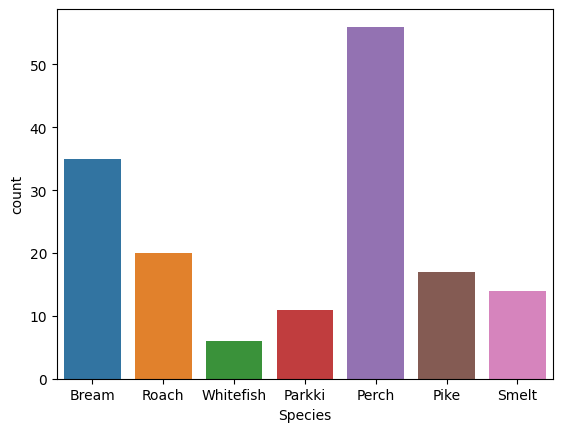

In [ ]:
#3.Shape of the data (visualization)
sns.countplot(x = 'Species', data = df_fish)

Countplot is a part of seaborn library which to plot the above figure.We can see that the perch has the highest count and whitefish has the lowest
count. This plot is the clear proof of imbalance in the dataset.

<Axes: xlabel='Weight', ylabel='Length3'>

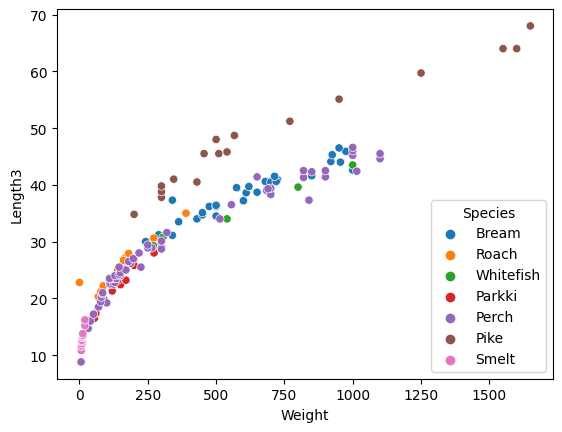

In [ ]:
#Relation between variables
#Relation between weight and length3
sns.scatterplot(x = 'Weight', y = 'Length3',hue = 'Species', data = df_fish)

sns.scatterplot is a part of seaborn package that is used visualize the data.  
It helps to compare two features of differnt species in the dataset.  
The 'hue' parameter is used to add a visual dimension to the scatterplot by coloring the points differently based on the values
in the 'Species' column.  
In the above plot we compare the features 'Weight' and 'Length3'.  
The Smelt and Parkki fish have lower weight and length3 as compared to other fish species.  
The Pike fish appears to have higher weight and length3 as compared to other species.  
The Bream, Whitefish, Perch and Roach lies in the middle of other species.

<Axes: xlabel='Length1', ylabel='Length2'>

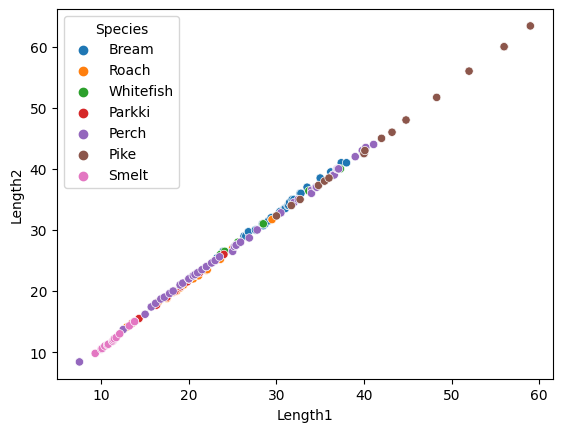

In [ ]:
#Relation between length1 and length2
sns.scatterplot(x = 'Length1', y = 'Length2',hue = 'Species', data = df_fish)

In the above plot we compare the features 'Length1' and 'Length2'.

In the above we compare Length1 and Length2 of different species.  
The Smelt fish are the smallest as compared to others.  
The Pike are the largest.  
All the other species lies in between the Smelt and Pike fish.


<Axes: xlabel='Height', ylabel='Width'>

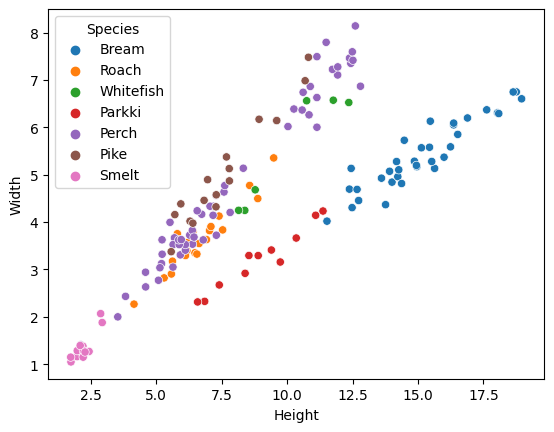

In [ ]:
#Relation between height and width
sns.scatterplot(x = 'Height', y = 'Width',hue = 'Species', data = df_fish)

In the above we compare Height and Width of different species.  
The Smelt are of the lowest height and width among other species.  
The Bream fish are tall in height and low in width as compared to Pike , Whitefish and Perch fish.  
The Parkki fish have less height and compared to all other species except smelt.  
The Perch fish have highest width compared to all species.  
The Roach, pike and whitefish lies in between other species.

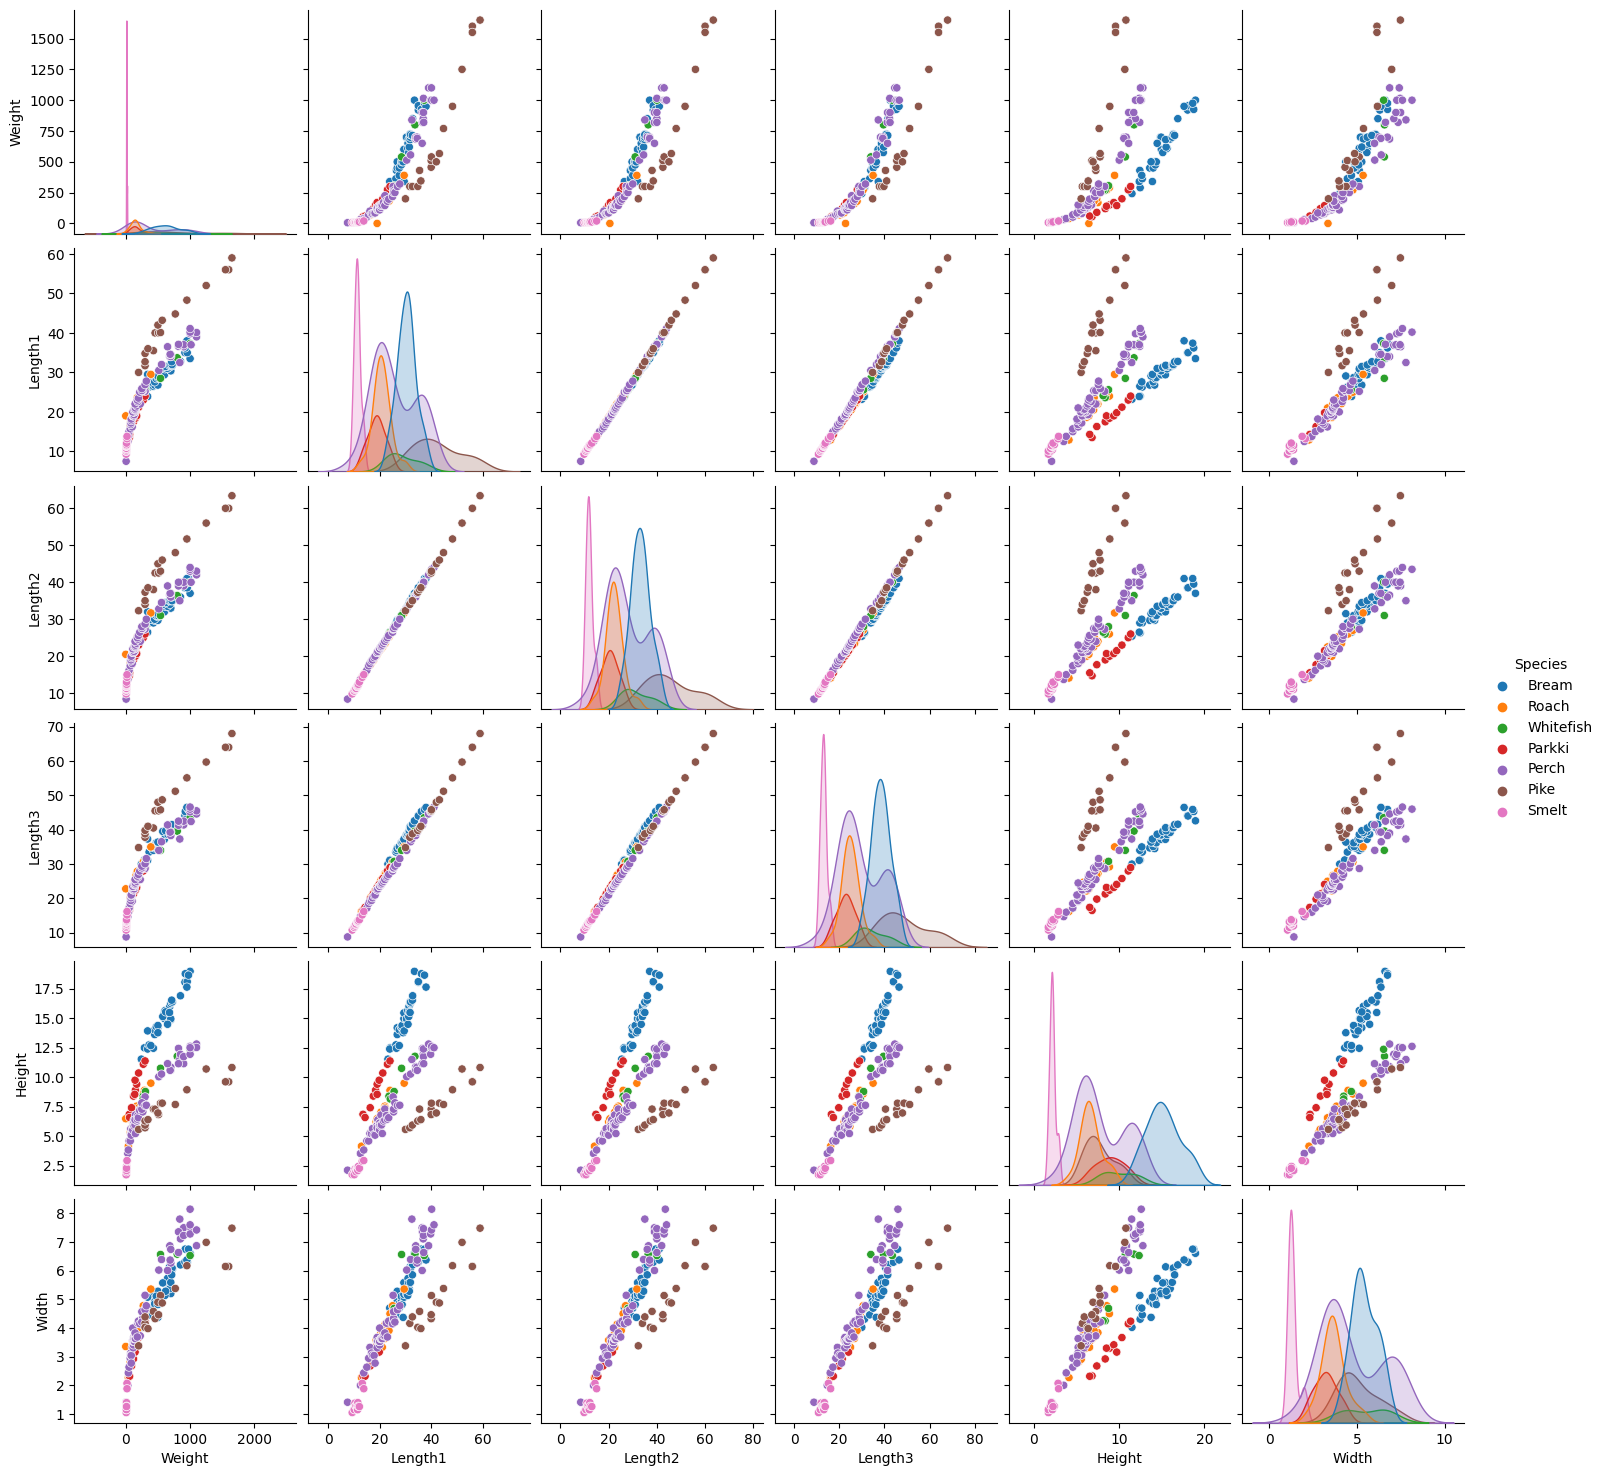

In [ ]:
#Multivariate analysis
sns.pairplot(df_fish, hue="Species")

sns.pairplot is part of seaborn package that helps to perform multivariate analysis on the dataset.  
In the above plot we compare every feature with each other and get clear picture of spread of data in the dataset.
Every plot above follows a linear pattern for different species.
From this plot, we can see that there is a huge amount of overlapping among the features.

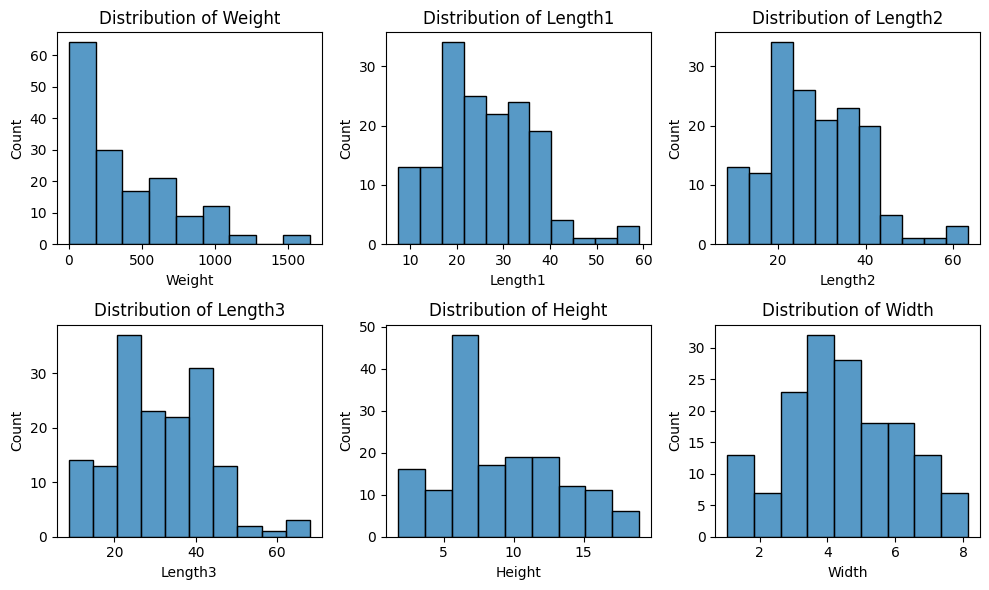

In [ ]:
#3.Histograms
features = df_fish[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
plt.figure(figsize = (10,6))                     #setting the size of each histogram
for i, col in enumerate(features.columns,1):     #for loop is used to print 6 plots as there are 6 features
    plt.subplot(2, 3, i)                         #6 plots are arranged in 2x3 manner
    sns.histplot(features[col])
    plt.title(f'Distribution of {col}')          #title of each plot
plt.tight_layout()                               #this method is used so that no plot gets overlapped with other.
plt.show()


Histograms are used to represent the distribution of each feature in the dataset.  
The highest frequency of the Weight is between 60 and 70 which is between 0 and 200.  
The highest frequency of the Length1 is between 30 and 40 which is between 15 and 25 .  
The highest frequency of the Length2 is between 30 and 40 which is between 15 and 25.  
The highest frequency of the Length3 is between 30 and 40 which is between 20 and 30.  
The highest frequency of the Height is between 40 and 50 which is between 5 and 10.  
The highest frequency of the Width is between 30 and 35 which is between 3 and 5.  

<ipython-input-37-0d69384ef00a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df_fish.corr()


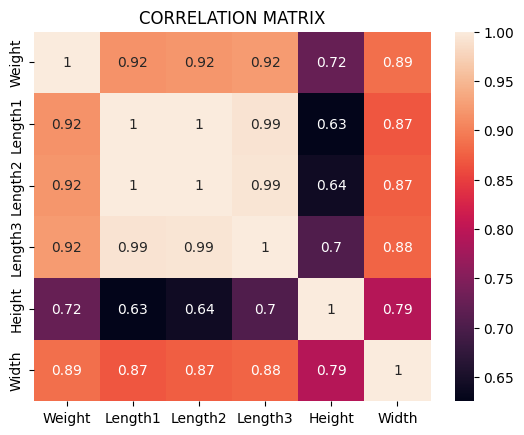

In [ ]:
#4.correlations
cm = df_fish.corr()
sns.heatmap(cm, annot = True)       #annot = true will place correlation values on the plot
plt.title("CORRELATION MATRIX")
plt.show()

Correlation matrix plottted by defining the correlation matrix using .corr() method and creating a plot by using heatmap for better understanding of the data.  
Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables.  
Correlation values varies between (-1,1). Negative (-1) indicates a inverse realtion between two parameters, that is if one feature increases the other decreases. Positive(1) indicates a linear relation between parameters.  
If correlation value is 0 then the parameters are independent.  
For example, In the above figure, all values are positive. hence, all variables are positively related to each other.  
The correlation value of Length1 and Length2 is 1. so if Length1 increases then Length2 increases as well.

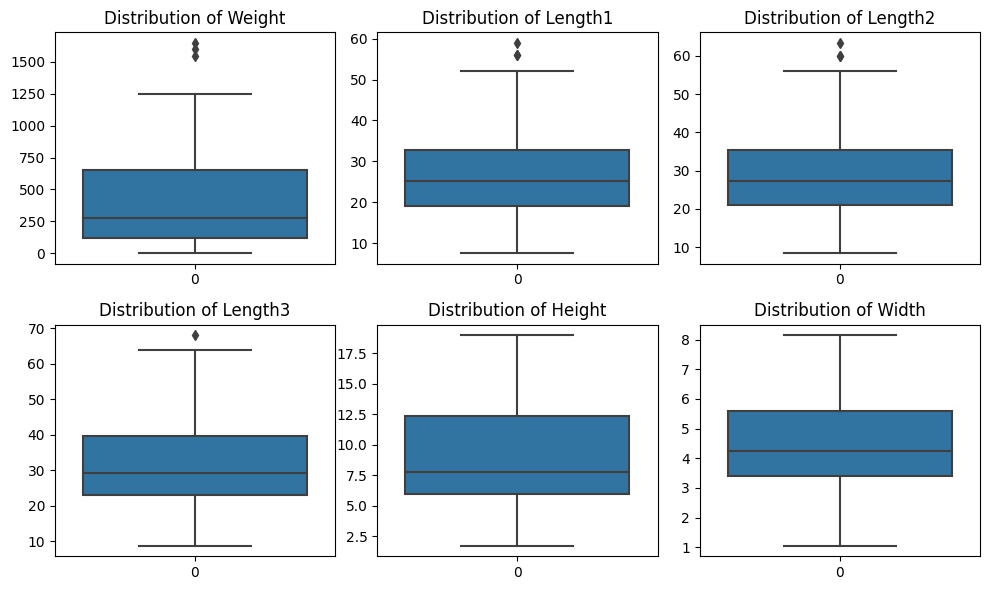

In [ ]:
#5.outliers
plt.figure(figsize = (10,6))
for i, col in enumerate(features.columns,1):
    plt.subplot(2, 3, i)
    sns.boxplot(features[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

sns.boxplot is used to visual the data in the form of Box and Whisker plot.  
Boxplot help us to find the outliers in the dataset.  
There are 6 boxplots for each feature in the fish dataset.  
We can see the dots in the plots above representing outliers which need to be dealt with for aquiring better accuracy for models.  

In [ ]:
#getting index of outliers
outliers = df_fish[(df_fish['Weight'] <= 0) | (df_fish['Weight'] > 1250)|(df_fish['Length1'] > 55)| (df_fish['Length2'] > 55)| (df_fish['Length3'] > 65)]
print(outliers)

    Species  Weight  Length1  Length2  Length3   Height   Width
40    Roach     0.0     19.0     20.5     22.8   6.4752  3.3516
141    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
142    Pike  1600.0     56.0     60.0     64.0   9.6000  6.1440
143    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
144    Pike  1650.0     59.0     63.4     68.0  10.8120  7.4800


Storing the indices of outliers in a variable called 'outliers'.

In [ ]:
#dropping the outliers
df_filtered = df_fish.drop(outliers.index)
print(df_fish.shape)
print(df_filtered.shape)

(159, 7)
(154, 7)


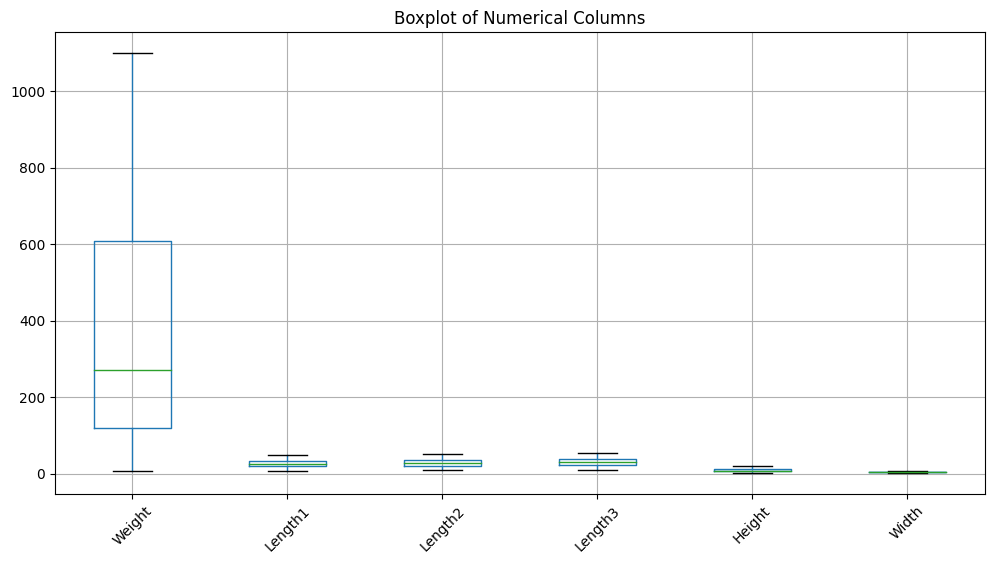

In [ ]:
plt.figure(figsize=(12, 6))
df_filtered.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

There are 5 outliers in the dataset for pike species because of the weight, length1, length2 and length3
.drop() method is used to drop these outliers by its indices.

Findings and Conclusion: Part 2  
In this section, we performed exploratory data analysis on the “Fish.csv”
dataset. From this analysis, we were able to gain insights into the data and
find meaningful information. Firstly, we summarized the sample and features
description from the dataset. There were 7 different species of fish with their
features such as weight, length, height, and width. Next, we checked for
missing data and duplicate data. The missing data was dealt and fortunately
there were no duplicated data. After this, we visualized the data using
countplot to check balance of data and found that the data was imbalanced.
The scatterplots are used to find relationships between features, but it is a
time-consuming process, so we moved on to pairplot to visualize all
relationships among the features including the feature itself. We observed
that there are linear patterns in most of the relations with minor variations.
We also observed that there is huge overlapping among the data. In my
opinion, the pairplot gave better visualization of the dataset. Next, we used
histograms to plot frequencies of each feature. We got to know the highest
frequencies of each feature. After visualizing the data, we identified the
significant correlations between the features. The features are all positively
related to each other with magnitude ranging from 0.63 to 1. Finally,
Boxplots are used to find the outliers in the dataset. There were 5 outliers
in the dataset which are removed from the dataset. The boxplot also
provides spread of data in each column. In conclusion, we have successfully
performed exploratory data analysis (EDA) on the fish dataset and gained
valuable information in this analysis.